<a href="https://colab.research.google.com/github/nemuulen/heat_stress_data_visualization/blob/map/Redesign_visualization_Yiqing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
uploaded = files.upload()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
# Step 0: Install necessary packages (only needed once in Colab)
# !pip install plotly pandas openpyxl

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import plotly.express as px

# Step 2: Load the dataset (make sure you’ve uploaded the CSV to Colab first)
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

# Step 3: Clean the dataset by removing missing temperature values and extracting year
df['Year'] = pd.to_datetime(df['dt']).dt.year
df_clean = df.dropna(subset=['AverageTemperature'])

# Step 4: Group by country and year, calculate average temperature
df_grouped = df_clean.groupby(['Country', 'Year'])['AverageTemperature'].mean().reset_index()

# Step 5: Limit to post-1900 data for meaningful animation
df_grouped = df_grouped[df_grouped['Year'] >= 1900]

# Step 6: Add narrative cues to certain country-year combinations
df_grouped["Narrative"] = np.where(
    (df_grouped["Country"] == "France") & (df_grouped["Year"] == 2003),
    "2003 European Heatwave",
    np.where(
        (df_grouped["Country"] == "Russia") & (df_grouped["Year"] == 2010),
        "2010 Russian Heatwave",
        ""
    )
)

# Step 7: Define a custom color scale to reflect emotional urgency
custom_colorscale = [
    [0.0, "#f2f2f2"],   # Bone white (calm)
    [0.5, "#ff7f00"],   # Orange red (warning)
    [1.0, "#800080"]    # Flaming purple (crisis)
]

# Step 8: Create the interactive animated map
fig = px.choropleth(
    df_grouped,
    locations="Country",
    locationmode="country names",
    color="AverageTemperature",
    hover_name="Country",
    hover_data={
        "Year": True,
        "AverageTemperature": ':.2f',
        "Narrative": True
    },
    animation_frame="Year",
    color_continuous_scale=custom_colorscale,
    range_color=(df_grouped['AverageTemperature'].min(), df_grouped['AverageTemperature'].max()),
    title="Feeling the Heat: Global Land Temperature by Country (1900–2013)"
)

# Step 9: Style the map and show
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True),
    coloraxis_colorbar=dict(title="Avg Temp (°C)"),
    width=1100,
    height=600
)
# Step 10: Add reflective annotation (quote from Prof. Li)
fig.add_annotation(
    text="“Sometimes what we need is not efficiency, but patience.” – Prof. Binbin Li",
    xref="paper", yref="paper",
    x=0.5, y=1.12,
    showarrow=False,
    font=dict(size=14, color="gray"),
    align="center",
    bgcolor="rgba(255,255,255,0.7)",
    bordercolor="lightgray",
    borderwidth=1
)

fig.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NYC_Central_Park_weather_1869-2022.csv to NYC_Central_Park_weather_1869-2022.csv


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import plotly.express as px

# Step 2: Load dataset
df = pd.read_csv('NYC_Central_Park_weather_1869-2022.csv')
df['DATE'] = pd.to_datetime(df['DATE'])

# Step 3: Clean and process data
df = df.dropna(subset=['TMIN', 'TMAX'])  # Remove rows with missing temp
df['TAVG'] = (df['TMIN'] + df['TMAX']) / 2
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month
df['YearMonth'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str) + '-01')

# Step 4: Group by Year and Month
df_monthly = df.groupby(['Year', 'Month'])['TAVG'].mean().reset_index()
df_monthly['YearMonth'] = pd.to_datetime(df_monthly['Year'].astype(str) + '-' + df_monthly['Month'].astype(str) + '-01')

# Step 5: Create interactive time series plot with warm color
fig = px.line(
    df_monthly,
    x='YearMonth',
    y='TAVG',
    title='Monthly Average Temperature in Central Park, NYC (1869–2022)',
    labels={
        'YearMonth': 'Date',
        'TAVG': 'Avg Temp (°F)'
    },
    line_shape="linear"
)

fig.update_traces(line=dict(color='orange'))

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Average Temperature (°F)',
    width=1000,
    height=500
)

fig.show()

Saving ex_map-min.png to ex_map-min (3).png


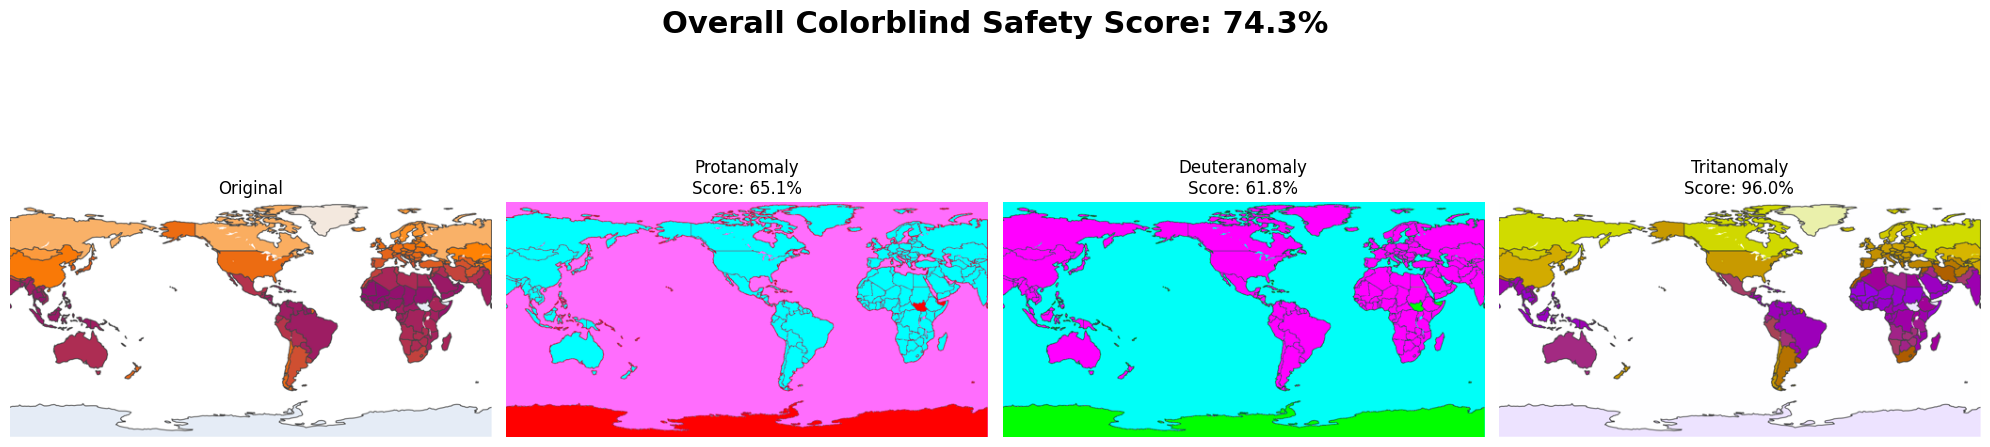

In [10]:
# Install required packages
!pip install -q colorspacious Pillow matplotlib numpy

# Upload image
from google.colab import files
from PIL import Image
import numpy as np
import colorspacious
import matplotlib.pyplot as plt

uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Load full-resolution image but resize only for display if needed
def load_image(path):
    with Image.open(path) as img:
        img = img.convert('RGB')
        return np.array(img)

# Resize for visualization only
def resize_for_display(img, max_size=512):
    img_pil = Image.fromarray(img)
    img_pil.thumbnail((max_size, max_size))
    return np.array(img_pil)

# Simulate colorblind vision
def simulate_cb(img, cb_type):
    img_norm = img.astype(np.float32) / 255.0
    reshaped = img_norm.reshape(-1, 3)
    simulated = colorspacious.cspace_convert(
        reshaped,
        start="sRGB1",
        end={"name": "sRGB1+CVD", "cvd_type": cb_type, "severity": 100}
    )
    return (simulated.reshape(img.shape) * 255).clip(0, 255).astype(np.uint8)

# Compute perceptual difference
def perceptual_diff(img1, img2):
    return np.mean(np.abs(img1.astype(np.int16) - img2.astype(np.int16))) / 255 * 100

# Run the full analysis
try:
    full_img = load_image(filename)
    cb_types = ['protanomaly', 'deuteranomaly', 'tritanomaly']
    sims = {}
    scores = []

    for cb in cb_types:
        sim = simulate_cb(full_img, cb)
        sims[cb] = sim
        diff = perceptual_diff(full_img, sim)
        score = max(0, 100 - diff)
        scores.append(score)

    overall_score = np.mean(scores)

    # Resize for display to avoid overload in colab notebook
    display_img = resize_for_display(full_img)
    display_sims = {cb: resize_for_display(sims[cb]) for cb in cb_types}

    # Display comparison
    fig, axs = plt.subplots(1, 4, figsize=(20, 6))
    axs[0].imshow(display_img)
    axs[0].set_title("Original")

    for i, cb in enumerate(cb_types):
        axs[i+1].imshow(display_sims[cb])
        axs[i+1].set_title(f"{cb.capitalize()}\nScore: {scores[i]:.1f}%")

    for ax in axs:
        ax.axis('off')

    plt.suptitle(f"Overall Colorblind Safety Score: {overall_score:.1f}%", fontsize=22, fontweight='bold')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Error:", e)